In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
import warnings
# Menonaktifkan semua warning
warnings.filterwarnings("ignore")

In [3]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("shop_data_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


About Dataset

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

- Customer ID - Unique ID for each customer
- Gender - for customer
- Age - for customer
- Annual Income - Annual income of a customer
- Spending Score - Score assigned by the shop, based on customer behavior and spending nature
- Profession - for customer
- Work Experience - in years
- Family Size - Family members of a customer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
df.duplicated().sum()

0

Diketahui pada kolom "Profession" ada 35 baris data yang Null.

In [9]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Seniman(Artist) merupakan Profesi customer terbanyak dalam dataset ini.

In [10]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [11]:
df[df['Age']==99]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
347,348,Female,99,184426,41,Artist,9,1
351,352,Male,99,173394,4,Engineer,13,1
361,362,Male,99,63364,61,Entertainment,1,2
546,547,Male,99,164781,83,Engineer,0,2
567,568,Female,99,172896,13,Engineer,0,3
937,938,Female,99,56851,72,Entertainment,6,3
1016,1017,Female,99,55972,83,Entertainment,1,7
1019,1020,Female,99,145777,94,Executive,1,5
1103,1104,Female,99,103706,50,Entertainment,1,2
1133,1134,Female,99,57677,99,Lawyer,0,5


In [12]:
df[df['Age']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,NaN,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


In [13]:
df[df['Spending Score (1-100)']==100]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
300,301,Male,85,153787,100,Entertainment,3,3
312,313,Female,24,118302,100,Lawyer,5,1
322,323,Female,89,110667,100,Healthcare,2,4
564,565,Female,51,141416,100,Healthcare,15,1
670,671,Male,54,59163,100,Marketing,3,3
680,681,Male,17,96154,100,Artist,1,4
707,708,Male,56,103210,100,Artist,6,6
823,824,Female,2,122698,100,Entertainment,8,1
906,907,Female,17,116463,100,Artist,8,4
1137,1138,Male,29,118092,100,Entertainment,7,3


In [14]:
df[df['Work Experience']==17]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
392,393,Male,21,119116,30,Artist,17,4
405,406,Female,65,119889,11,Artist,17,6
473,474,Male,20,130813,92,Artist,17,5
566,567,Female,19,180331,14,Artist,17,5
603,604,Female,91,69720,78,Lawyer,17,6


In [15]:
df[df['Family Size'] == 9]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
150,151,Male,43,30000,17,Lawyer,0,9


In [16]:
df[df['Annual Income ($)'] == 0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
169,170,Male,32,0,63,Artist,2,2
246,247,Male,23,0,96,Doctor,1,3


#### Drop Null

In [17]:
df = df.dropna(subset=['Profession'])
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [19]:
df.shape

(1965, 8)

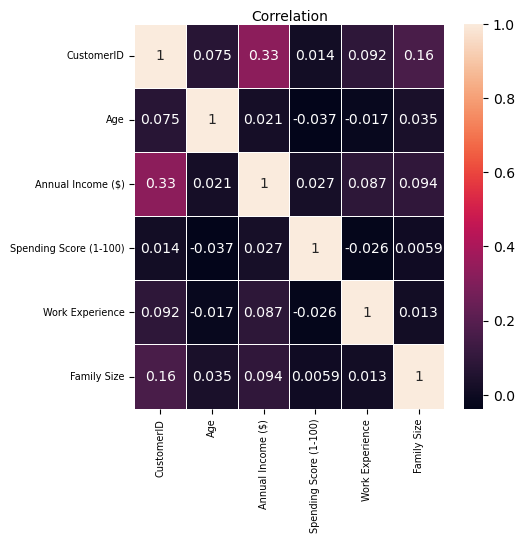

In [20]:
df_corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(df_corr, annot=True, linewidth=0.5)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Correlation", fontsize = 10, pad = 0.5)
plt.show()

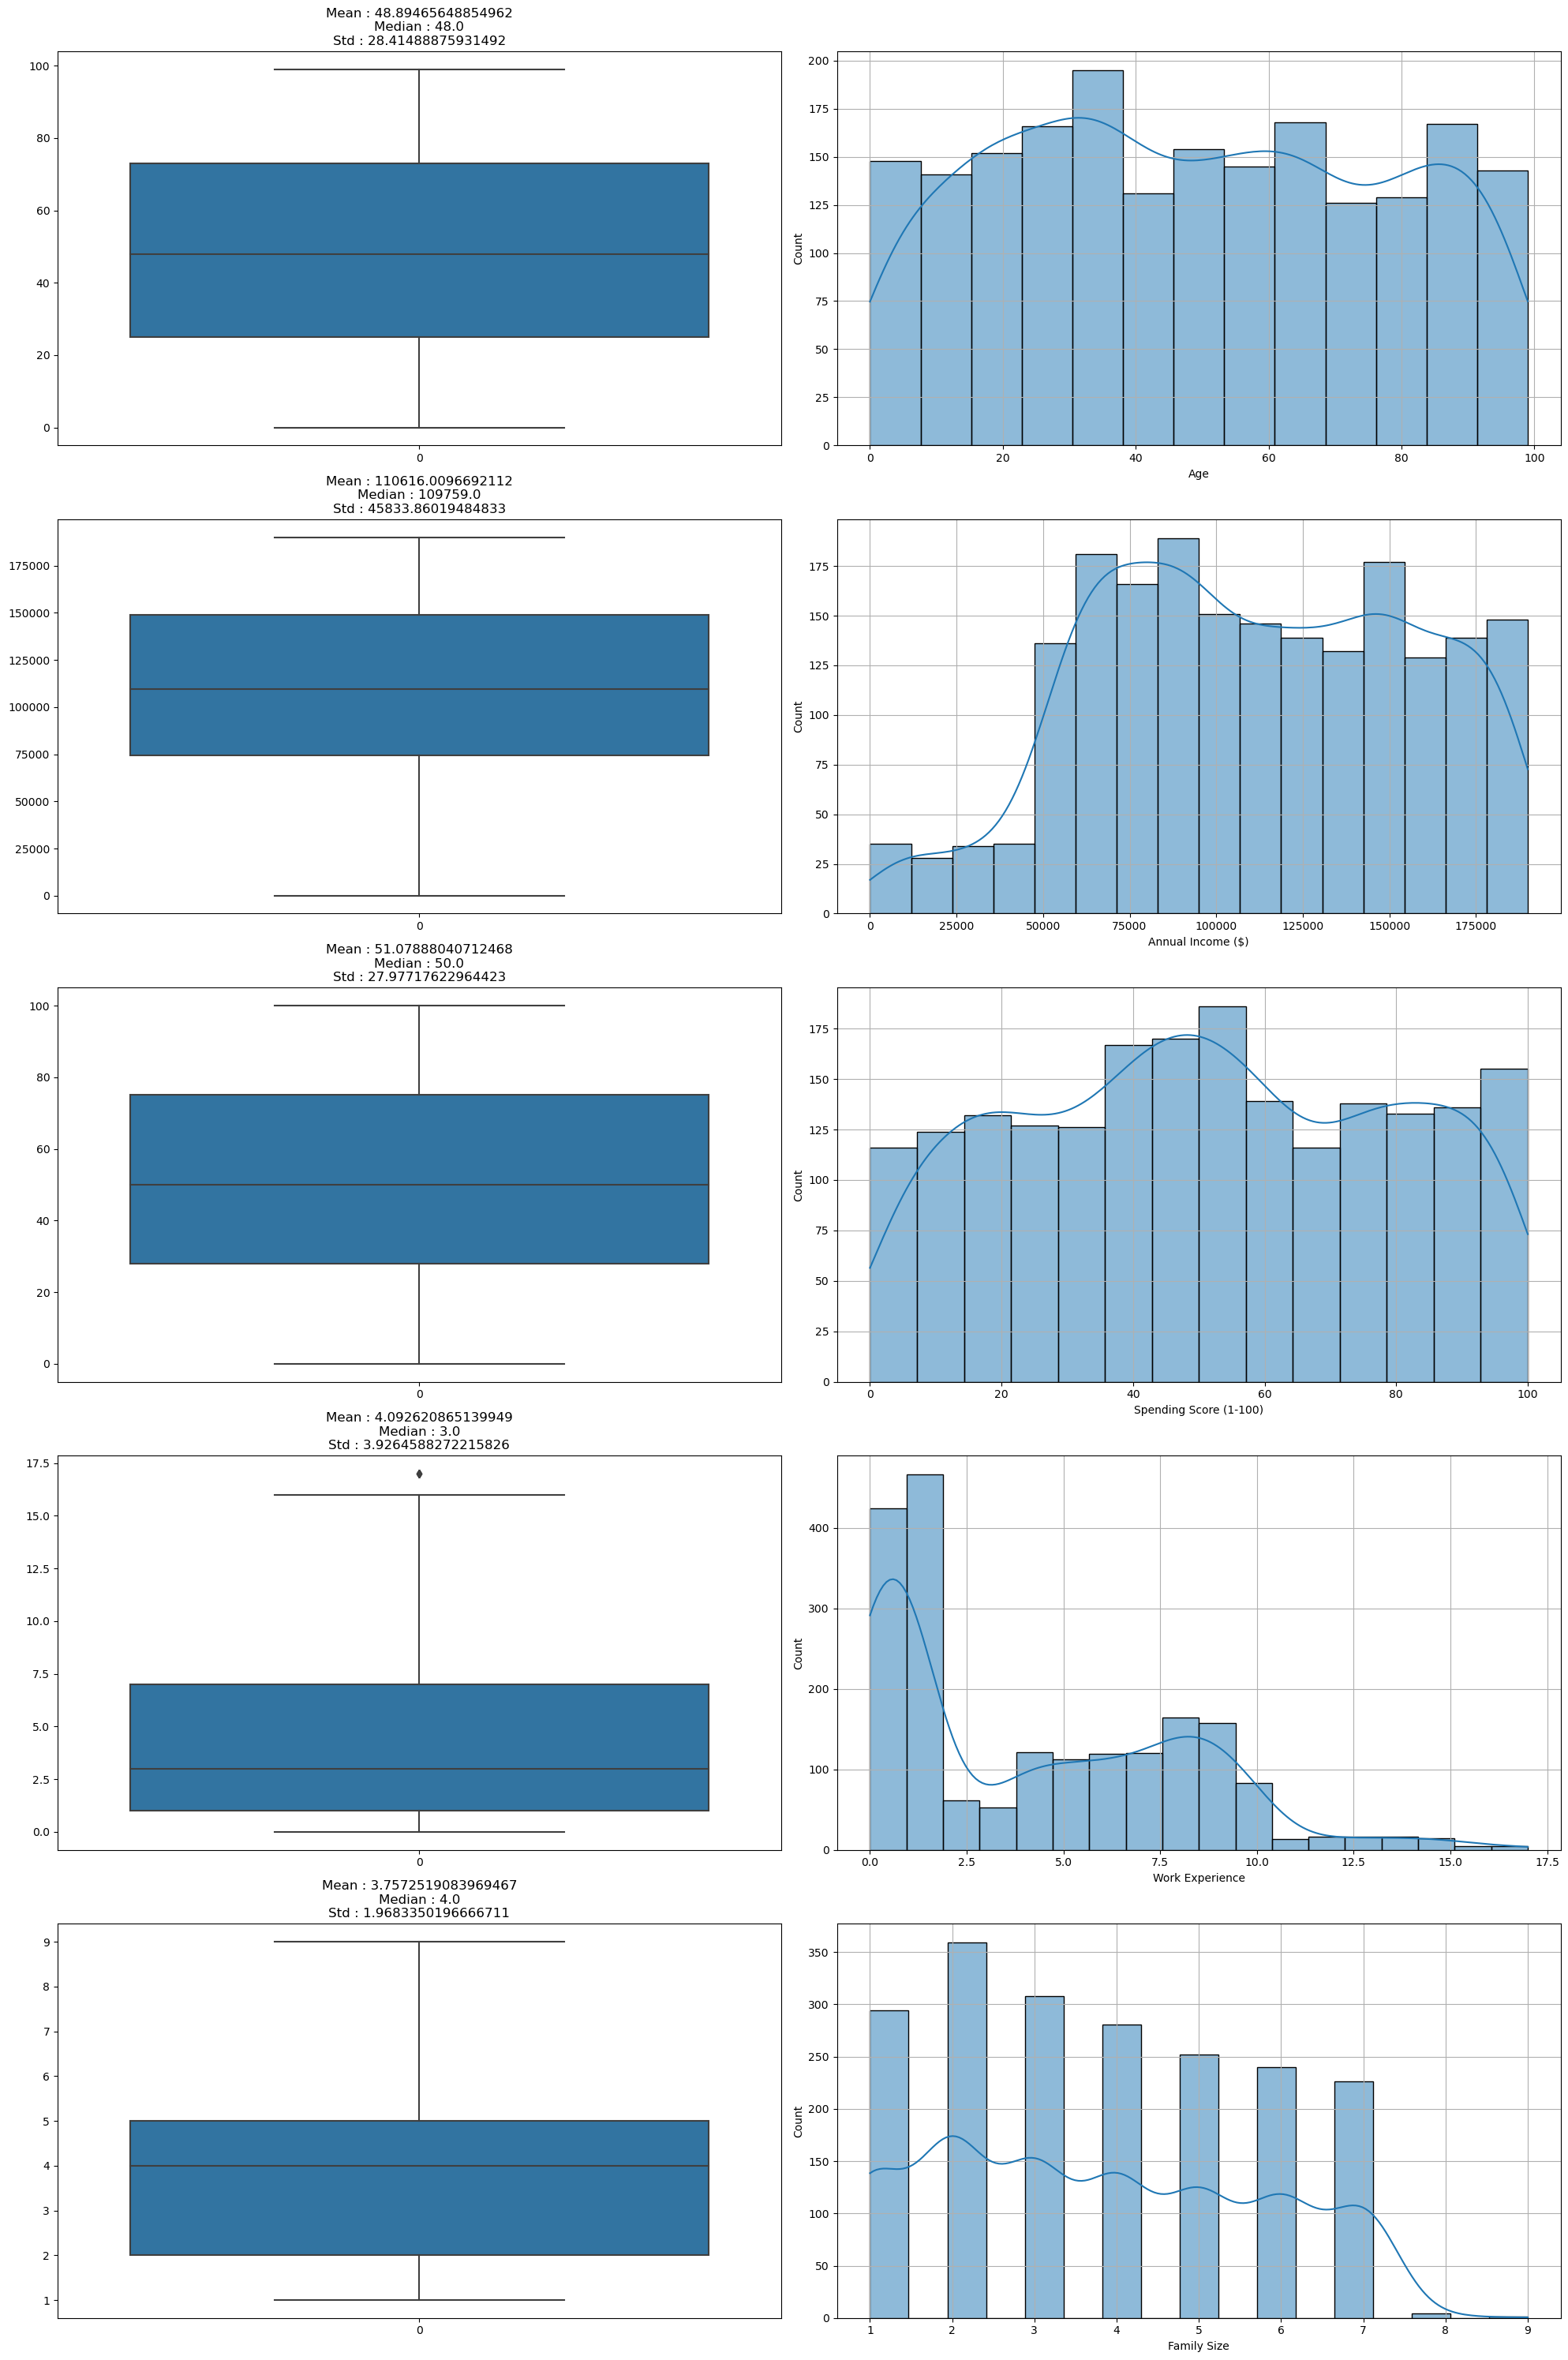

In [21]:
fitur_numerik = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

def observasi_numerik(fitur_numerik):
    fig, ax = plt.subplots(5,2, figsize = (20,30))
    for i, col in enumerate(fitur_numerik):
        sns.boxplot(df[col], ax=ax[i][0])
        sns.histplot(df[col], ax=ax[i][1], kde = True)
        ax[i][0].set_title("Mean : {}\nMedian : {}\nStd : {}".format(df[col].mean(),
                                                                    df[col].median(),
                                                                    df[col].std()))
        ax[i][1].grid()
    plt.tight_layout()
    plt.show()

observasi_numerik(fitur_numerik)

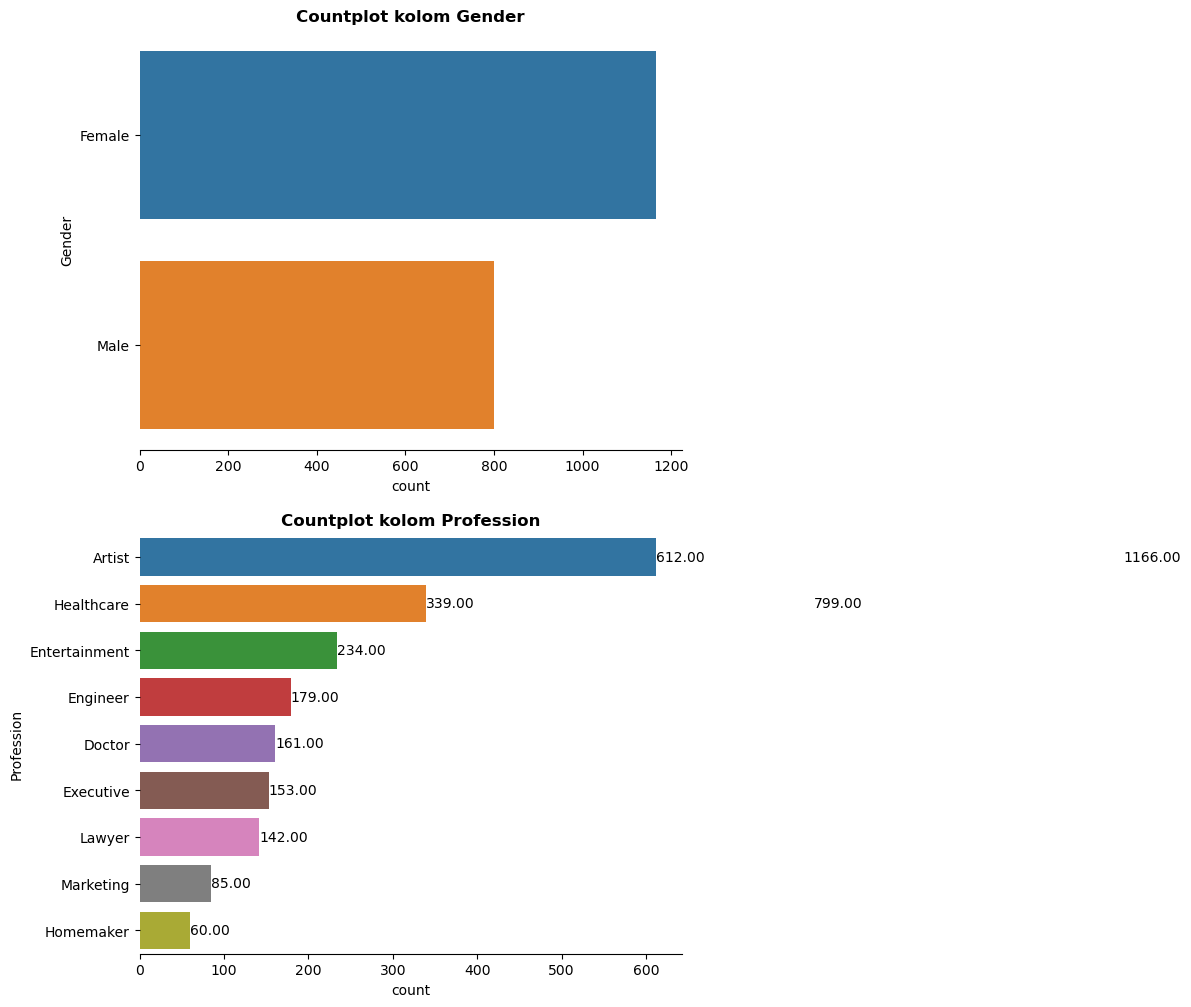

In [22]:
kategori = ['Gender', 'Profession']

def observasi_kategori(kategori):
    fig, ax = plt.subplots(2,1, figsize = (7,12))
    for i, col in enumerate(kategori):
        bars = sns.countplot(data = df, y=col, order = df[col].value_counts().index, ax = ax[i])
        for bar in bars.patches :
            width = bar.get_width()
            label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
            plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

        ax[i].set_title("Countplot kolom {}".format(col), weight = "bold")
        sns.despine(top = True, left = True, right = True)
        ax[i].axes.yaxis.set_visible(True)
        plt.tight_layout
    plt.show()

observasi_kategori(kategori)

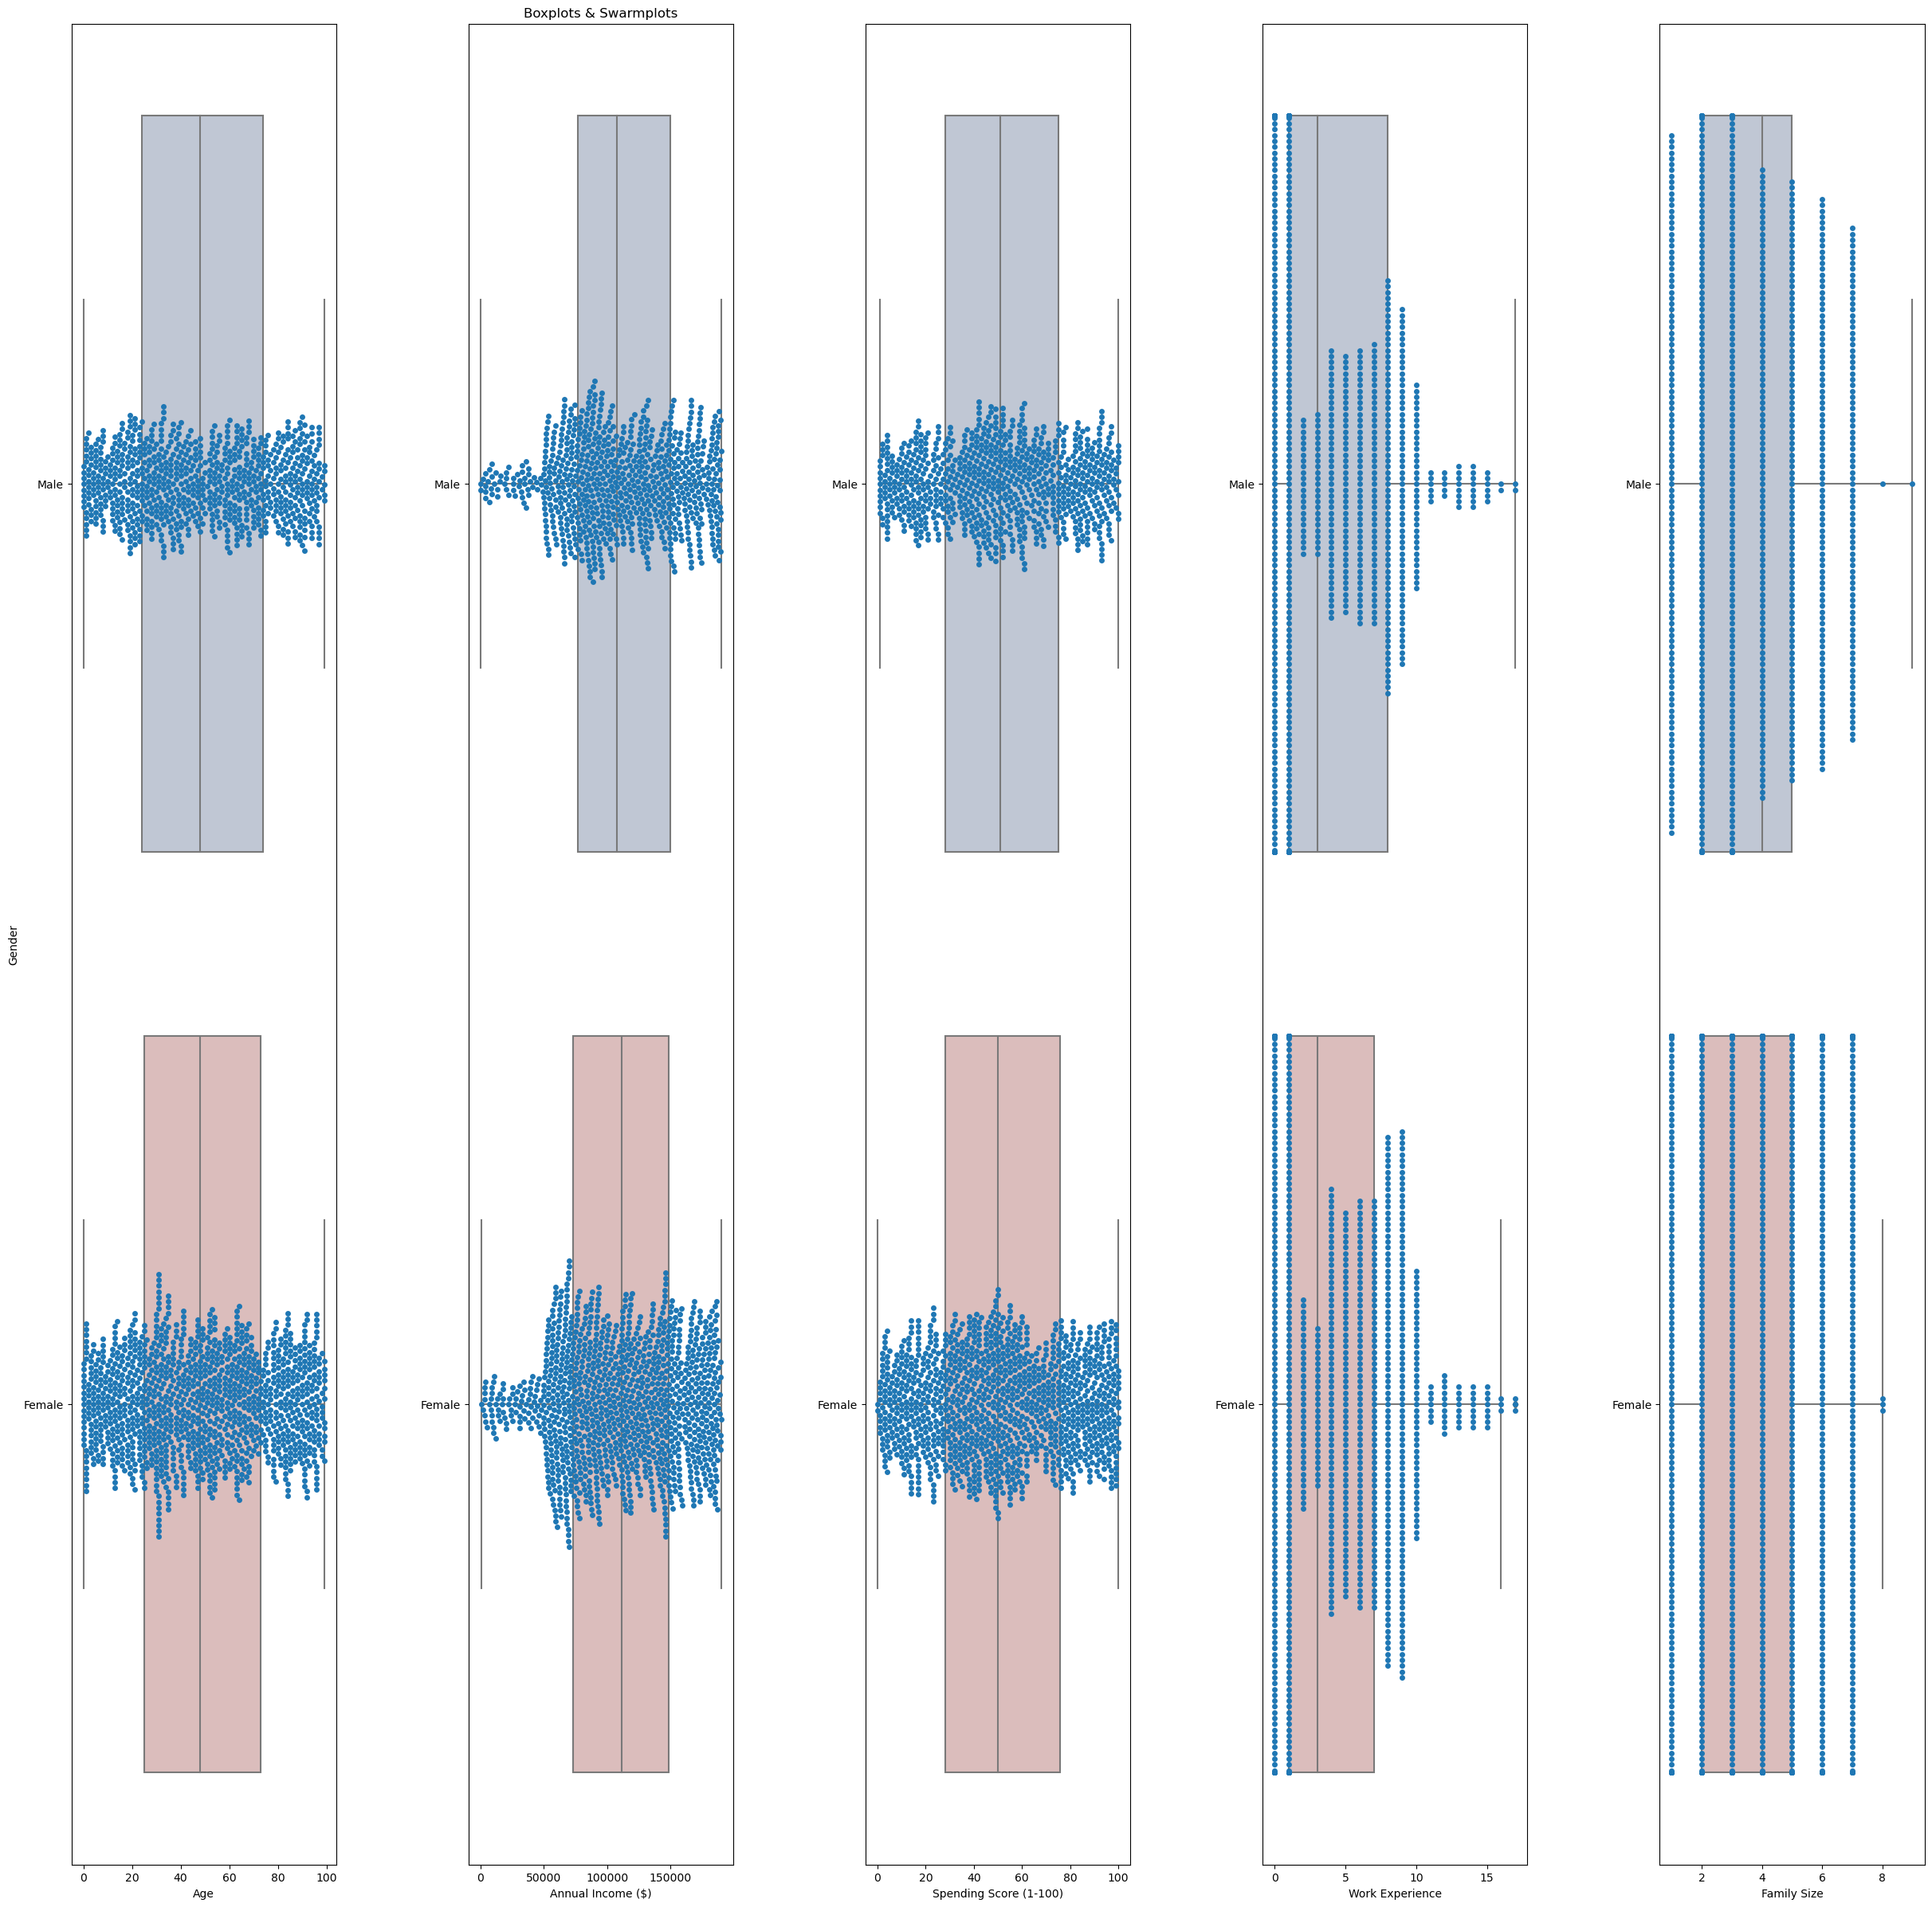

In [23]:
plt.figure(1 , figsize = (30 , 30))
n = 0 
for cols in ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']:
    n += 1 
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

#### Kesimpulan

- Gender Female lebih banyak dari Male
- Ada data yang hilang atau null pada kolom Profession
- Ditemukan outliers pada Gender Female berdasarkan Work Experience. Sepertinya outliers ini tidak akan dihilangkan, karena bernilai Objektif dan benar adanya.
- pekerjaan Seniman atau artist menjadi paling banyak sebagai Customer/pelanggan dalam dataset ini.
- Penghapusan Missing Value mengakibatkan data yang awalnya memiliki 2000 baris menjadi 1965 baris.
- dari EDA diatas banyak sekali records data yang aneh :
    Seperti Usia, bernilai 0, 2.
    Usia 2 tahun, sudah memiliki Work Experience 8 tahun.
    Ada 3 Customer yang memiliki Work Experience 17 Tahun, namun usia Customer tersebut tercatat dalam data yaitu 19, 20, 21 Tahun.
    Usia 99 tahun, memiliki Work Experience yang sangat rendah namun Annual Income mereka banyak lebih dari 100.000 dollar, saya tidak bisa memastikan apakah ini salah input atau memang mereka pernah menerima bayaran sebesar itu dan yang diinputkan kedalam data bayaran paling besar yang pernah didapat.
- Untuk beberapa EDA yang telah menemukan data yang aneh, saya disini tidak memiliki asumsi yang lebih mendasar, dikarenakan data yang saya ambil ini merupakan data dari Kaggle.

Keputusan untuk data yang hilang adalah dihapus, karena data yang hilang adalah data Kategori. Dan ketika dihapus (35 baris/2000 baris * 100) = hanya 1,25% pengaruh data yang null ketika dihapus.

### Modelling

In [24]:
df_model = df.copy()

In [25]:
scaler = StandardScaler()

df_model[fitur_numerik] = scaler.fit_transform(df_model[fitur_numerik])
df_model

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,-1.052345,-2.086675,-0.431850,Healthcare,-0.787837,0.123358
1,2,Male,-0.981941,-1.650205,1.069755,Engineer,-0.278342,-0.384815
2,3,Female,-1.017143,-0.537207,-1.611684,Engineer,-0.787837,-1.401161
3,4,Female,-0.911538,-1.126441,0.926745,Lawyer,-1.042584,-0.892988
4,5,Female,-0.629924,-1.584734,-0.396098,Entertainment,-0.533089,1.139704
...,...,...,...,...,...,...,...,...
1995,1996,Female,0.778147,1.609940,-0.396098,Artist,0.995394,1.647877
1996,1997,Female,1.482183,-0.817464,-0.682118,Doctor,0.740647,1.647877
1997,1998,Male,1.341376,-0.428941,-1.325663,Healthcare,1.250141,-0.892988
1998,1999,Male,0.989358,1.560226,-1.683189,Executive,0.740647,-0.892988


In [26]:
le = LabelEncoder()

df_model['Gender'] = le.fit_transform(df_model['Gender'])
unique_before = df['Gender'].unique()
unique_after = df_model['Gender'].unique()

print("{} : {}".format(unique_before, unique_after))

['Male' 'Female'] : [1 0]


In [27]:
df_model['Profession'] = le.fit_transform(df_model['Profession'])
unique_before = df['Profession'].unique()
unique_after = df_model['Profession'].unique()

print("{} : {}".format(unique_before, unique_after))

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing'] : [5 2 7 3 0 4 1 6 8]


Merubah nama variable agar lebih mudah mengetahuinya

In [28]:
df_model.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358
1,2,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815
2,3,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161
3,4,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988
4,5,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704


In [29]:
from sklearn import metrics

### Experiment 1

In [30]:
exp_1 = df_model[['Age', 'Annual Income ($)']]
exp_1

,Age,Annual Income ($)
0,-1.052345,-2.086675
1,-0.981941,-1.650205
2,-1.017143,-0.537207
3,-0.911538,-1.126441
4,-0.629924,-1.584734
...,...,...
1995,0.778147,1.609940
1996,1.482183,-0.817464
1997,1.341376,-0.428941
1998,0.989358,1.560226


### Modeling

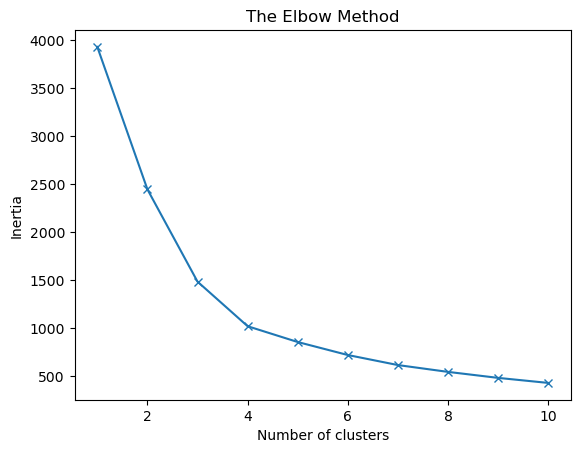

In [31]:
kmeans = KMeans()

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(exp_1)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker = 'x')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Dari hasil Metode Elbow, angka 3 adalah hasil yang paling optimal menurut Elbow Method.

In [32]:
model_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
model_kmeans.fit(exp_1)
cluster = model_kmeans.predict(exp_1)
df_exp_1 = df.copy()
df_exp_1['cluster'] = cluster
print("Cluster : {}".format(cluster))
df_exp_1.head()

Cluster : [0 0 0 ... 2 2 2]


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,Male,19,15000,39,Healthcare,1,4,0
1,2,Male,21,35000,81,Engineer,3,3,0
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,0
4,5,Female,31,38000,40,Entertainment,2,6,0


In [33]:
label_kmeans = model_kmeans.labels_
cluster_c_kmeans = model_kmeans.cluster_centers_
print(cluster_c_kmeans)

[[-0.48318673 -1.00186075]
 [-0.78601738  0.87310085]
 [ 1.04882695  0.203764  ]]


In [34]:
ss = silhouette_score(exp_1, label_kmeans, metric = 'euclidean')
print("Silhouette Score : {}".format(ss))

Silhouette Score : 0.3930609645573797


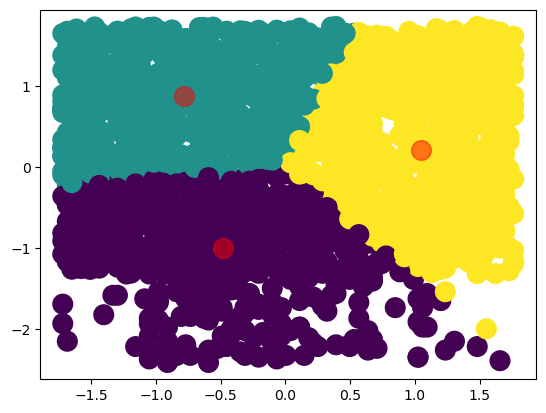

In [35]:
# Plot data points
plt.scatter(x = 'Age', y = 'Annual Income ($)', data = exp_1, c = label_kmeans, s =200)
# Plot cluster centers
plt.scatter(x = model_kmeans.cluster_centers_[:, 0], y = model_kmeans.cluster_centers_[:, 1], s=200, c='red', alpha = 0.5)
plt.show()

In [36]:
interpret_kmeans = df_model[['Age', 'Annual Income ($)']]
interpret_kmeans['cluster'] = label_kmeans

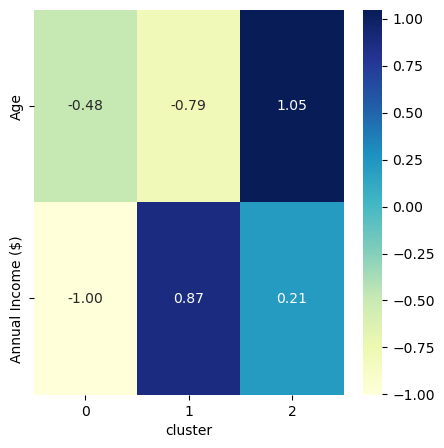

In [37]:
heatmap_kmeans = interpret_kmeans.groupby('cluster').mean()
plt.figure(figsize=(5, 5))
sns.heatmap(heatmap_kmeans.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

Penjelasan untuk feature cluster (Age, Annual Income) : 
- Untuk cluster 0 = Segmentasi customer tidak terpatok pada kategori umur dan pendapatan pertahun, dengan kata lain lebih menyeluruh
- Untuk cluster 1 = Secara keseluruhan, cluster 1 ini lebih kuat kedalam fitur "Annual Income" dengan rata-rata nilainya 0.87 
- Untuk cluster 2 = Untuk cluster 2, secara keseluruhan cluster 2 ini sangat kuat terhadap segmentasi Umur yang mempunyai nilai rata-rata 1.05. Namun pada cluster 2 ini juga ada nilai Annual Income yang cukup lumayan besar yaitu 0.21. jadi dapat kita simpulkan untuk cluster 2 ini untuk segmentasi pelanggan berdasarkan umur dan pendapatan pertahun

Kesimpulan : Masing-masing cluster memiliki karakter segmentasi tersendiri, keputusan yang diambil harus yang paling cocok dengan hal-hal dibutuhkan.


In [38]:
df_exp_1[df_exp_1['cluster']==0].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.0
mean,725.048930,35.214067,64725.333333,49.429664,3.695719,3.449541,0.0
std,619.614095,18.891892,25394.130383,28.070908,3.791755,1.891318,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,173.250000,21.000000,52257.000000,25.000000,1.000000,2.000000,0.0
50%,526.500000,34.000000,67884.000000,49.000000,2.000000,3.000000,0.0
75%,1267.750000,49.000000,84630.250000,73.750000,7.000000,5.000000,0.0
max,1995.000000,96.000000,109346.000000,100.000000,16.000000,9.000000,0.0


Total customer pada cluster 0 adalah 654 customer. Karakteristik pada cluster 0 ini untuk segmentasi umur bisa kita lihat pada tabel describe() diatas, yang menunjukan bahwa rentan umur cluster 0 ini dari umur 0 hingga 96, dan pendapatan pertahun juga dari 0 hingga 109346 dollar pertahun. Segmentasi pada cluster 0 ini bisa digunakan untuk promosi produk, campaign, dan lain-lain yang tidak memiliki patokan customer yang signifikan. 

In [39]:
df_exp_1[df_exp_1['cluster']==1].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0
mean,1149.125000,26.451389,150572.449653,53.493056,4.458333,3.914931,1.0
std,491.784737,17.094552,24519.957326,28.150341,4.099841,1.996881,0.0
min,274.000000,0.000000,100429.000000,1.000000,0.000000,1.000000,1.0
25%,726.000000,12.000000,130672.000000,31.000000,1.000000,2.000000,1.0
50%,1152.500000,25.000000,150183.500000,53.000000,4.000000,4.000000,1.0
75%,1582.250000,40.000000,171626.250000,78.000000,8.000000,6.000000,1.0
max,1991.000000,64.000000,189945.000000,100.000000,17.000000,8.000000,1.0


untuk cluster 1, bisa kita lihat untuk rentang umurnya yang masuk kedalam cluster 1 adalah rentang umur 0 hingga 64 tahun. untuk pendapatan pertahun rentang dari 100429 dollar hingga 189945 dollar. Cluster 1 lebih men-segmentasi customer yang memiliki pendapatan pertahun yang cukup besar. Perusahaan bisa menggunakan cluster 1 ini jika ingin mempromosikan produk menengah keatas atau mid-to-high kepada customer yang bependapatan besar dan rentang umur dari 0 hingga 64 tahun. total data dari cluster 1 adalah 576 customer.

In [40]:
df_exp_1[df_exp_1['cluster']==2].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0
mean,1128.613605,78.655782,120136.544218,50.654422,4.159184,3.907483,2.0
std,512.745899,12.845652,36828.436652,27.665682,3.878674,1.983484,0.0
min,9.000000,50.000000,19000.000000,0.000000,0.000000,1.000000,2.0
25%,703.500000,68.000000,91000.000000,28.000000,1.000000,2.000000,2.0
50%,1135.000000,80.000000,119223.000000,50.000000,4.000000,4.000000,2.0
75%,1561.500000,90.000000,150403.000000,75.000000,8.000000,6.000000,2.0
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,7.000000,2.0


untuk cluster 2, pada cluster ini rentang umur di sekitar umur 50 hingga 99 tahun. untuk pendapatan pertahunnya direntang 19000 dollar hingga 189974 dollar. total data dari cluster 2 adalah 735 customer.

### Menggunakan model Mean Shift

In [41]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [42]:
bandwidth = estimate_bandwidth(exp_1, quantile=0.2, n_samples=len(exp_1))
ms = MeanShift(bandwidth = 1)
ms.fit(exp_1)

ms_labels = ms.labels_
ss = silhouette_score(exp_1, ms_labels)
print("Silhoutte Score : ", ss)

Silhoutte Score :  0.3925497778262584


In [43]:
ch_score = metrics.calinski_harabasz_score(exp_1, ms_labels)
print('CH Score : ', ch_score)

CH Score :  1786.1515314049245


In [44]:
db_score = metrics.davies_bouldin_score(exp_1, ms_labels)
print('Davies-Bouldin Index: ', db_score)

Davies-Bouldin Index:  0.789191619313172


In [45]:
ms_labels

array([1, 1, 1, ..., 0, 2, 0], dtype=int64)

Menyimpan cluster kedalam dataframe dan variable baru dengan fitur "Age" dan "Annual Income($)"

In [46]:
df_exp_1['cluster_ms'] = ms_labels

In [47]:
df_exp_1['cluster_ms'].unique()

array([1, 0, 2, 3], dtype=int64)

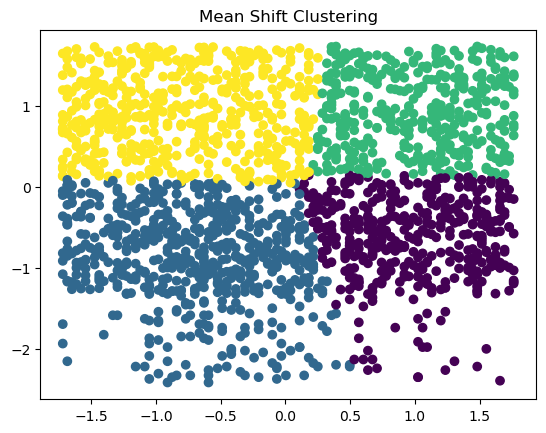

In [48]:
 plt.scatter(x = 'Age', y = 'Annual Income ($)', c=ms_labels, data = exp_1)
 plt.title('Mean Shift Clustering')
 plt.show()

In [49]:
interpret_ms = df_model[['Age', 'Annual Income ($)']]
interpret_ms['cluster_ms'] = ms_labels

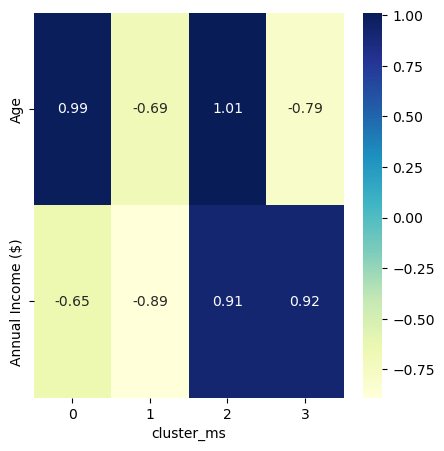

In [50]:
heatmap_kmeans = interpret_ms.groupby('cluster_ms').mean()
plt.figure(figsize=(5, 5))
sns.heatmap(heatmap_kmeans.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

Intepretasi profil tiap cluster : 
- Cluster 0 = Cenderung segmentasi customer berdasarkan umur
- Cluster 1 = Cenderung lebih general antara umur dan pendapatan pertahun
- Cluster 2 = Segmentasi berdasarkan umur dan pendapatan pertahun
- Cluster 3 = Cenderung segmentasi customer berdasarkan pendapatan pertahun

In [51]:
df_exp_1[df_exp_1['cluster_ms']==0].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster,cluster_ms
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.0
mean,1024.550691,77.041475,80819.258065,50.453917,3.983871,3.794931,1.594470,0.0
std,564.099858,12.841299,23707.057442,27.499216,3.837606,1.965493,0.805046,0.0
min,9.000000,52.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,540.000000,66.000000,66515.750000,27.250000,1.000000,2.000000,2.000000,0.0
50%,1015.500000,78.000000,84083.500000,49.500000,3.000000,4.000000,2.000000,0.0
75%,1519.250000,89.000000,98419.000000,74.000000,7.000000,5.000000,2.000000,0.0
max,2000.000000,99.000000,117181.000000,100.000000,17.000000,7.000000,2.000000,0.0


total data dari cluster 0 adalah 434 customer, cluster 0 men-segmentasi customer cenderung kearah umur. rentang umurnya adalah 52 tahun hingga 99 tahun. untuk pendapatan pertahun rentang dari 1000 dollar hingga 117181 dollar. cocok untuk campaign produk yang market produknya cocok untuk umur 52 hingga 99 tahun.

In [52]:
df_exp_1[df_exp_1['cluster_ms']==1].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster,cluster_ms
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.0
mean,754.980614,29.384491,69851.694669,49.840065,3.812601,3.465267,0.088853,1.0
std,619.179379,15.405652,26902.454176,28.166207,3.870530,1.896174,0.295908,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,177.500000,18.000000,55252.000000,26.000000,1.000000,2.000000,0.000000,1.0
50%,599.000000,30.000000,71000.000000,49.000000,2.000000,3.000000,0.000000,1.0
75%,1305.500000,41.000000,89736.500000,74.000000,7.000000,5.000000,0.000000,1.0
max,1995.000000,63.000000,114556.000000,100.000000,16.000000,9.000000,2.000000,1.0


untuk cluster 1 total datanya adalah 619 customer. pada cluster ini memiliki karakteristik yang general. rentang umur 0 hingga 63 tahun, dan pendapatan pertahun rentang dari 0 - hingga 114556 dollar. cluster ini cocok untuk campaign produk yang market produknya untuk semua kalangan.

In [53]:
df_exp_1[df_exp_1['cluster_ms']==2].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster,cluster_ms
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.0
mean,1157.618687,77.654040,152314.851010,51.406566,4.090909,3.904040,1.941919,2.0
std,497.426159,12.807395,21257.980633,27.532698,3.836113,1.979869,0.234192,0.0
min,83.000000,55.000000,117203.000000,1.000000,0.000000,1.000000,1.000000,2.0
25%,740.250000,66.000000,133458.750000,30.000000,1.000000,2.000000,2.000000,2.0
50%,1175.500000,79.000000,151766.000000,51.000000,3.500000,4.000000,2.000000,2.0
75%,1571.750000,88.000000,171440.750000,76.000000,7.000000,6.000000,2.000000,2.0
max,1999.000000,99.000000,189974.000000,100.000000,17.000000,7.000000,2.000000,2.0


untuk cluster 2 total datanya adalah 396 customer. cluster 2 ini memiliki karakteristik direntang umur 55 hingga 99 tahun. untuk pendapatan pertahun direntang 117203 dollar - 189974 dollar. cluster ini cocok untuk campaign produk yang memiliki skala umur dan pendapatan pertahun tersebut. produk yang dimaksud bisa produk yang mempunyai market mid to high or highclass customer.

In [54]:
df_exp_1[df_exp_1['cluster_ms']==3].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster,cluster_ms
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.0
mean,1153.496124,26.554264,152577.560078,52.839147,4.521318,3.963178,1.027132,3.0
std,493.214865,16.390945,21841.091166,28.467582,4.106061,2.010796,0.162625,0.0
min,274.000000,0.000000,112957.000000,1.000000,0.000000,1.000000,1.000000,3.0
25%,729.500000,13.000000,134537.500000,30.000000,1.000000,2.000000,1.000000,3.0
50%,1162.500000,26.000000,151104.500000,52.000000,4.000000,4.000000,1.000000,3.0
75%,1588.250000,41.000000,170645.750000,78.000000,8.000000,6.000000,1.000000,3.0
max,1991.000000,56.000000,189709.000000,100.000000,17.000000,8.000000,2.000000,3.0


untuk cluster 3 total datanya adalah 516 customer. cluster 2 ini memiliki karakteristik direntang umur 0 hingga 56 tahun. untuk pendapatan pertahun direntang 112957 dollar - 189709 dollar. cluster ini cocok untuk campaign produk yang memiliki skala umur dan pendapatan pertahun tersebut. produk yang dimaksud bisa produk yang mempunyai market mid to high or highclass customer.